This is my final project which I used machine learning to find predictions of future application reviews:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../input/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing all null entries:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


This is where I am cleaning up the data from our .csv file: 

In [8]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

Cleaning of sizes of the apps and also filling up the missing values using ffill

In [9]:
# scaling and cleaning size of installation
# I found this online at Git:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size of those who had NA
df.Size.fillna(method = 'ffill', inplace = True)


Cleaning the number of installations column

In [10]:
# Cleaning:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

Converting the paid/free classification types into binary

In [11]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

* Converting of the content rating section into int

In [12]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

I dropped these portions of information as i deemed it unecessary for our machine learning algorithm

In [13]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [14]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

Cleaning of the prices of the apps to floats

In [15]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

Finally converting the number reviews column into integers

In [16]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null int64
Genres            9360 non-null object
Category_c        9360 non-null int64
Genres_c          9360 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


Doing checks and we are good to go! So I created first this dataframe that has **integer encoding** of categorical variables, defined as df

In [18]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In this instance, I created another dataframe that specifically created **dummy values** for each categorical instance in the dataframe, defined as df2

In [19]:
# dummy variable for Categories
df2 = pd.get_dummies(df, columns=['Category'])

In [20]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# 3 different regression models:

The following is code to obtain the error terms for the various models:

In [22]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [23]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

We start off by looking at **linear regression** model (without the genre label)

In [24]:
#excluding Genre label
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


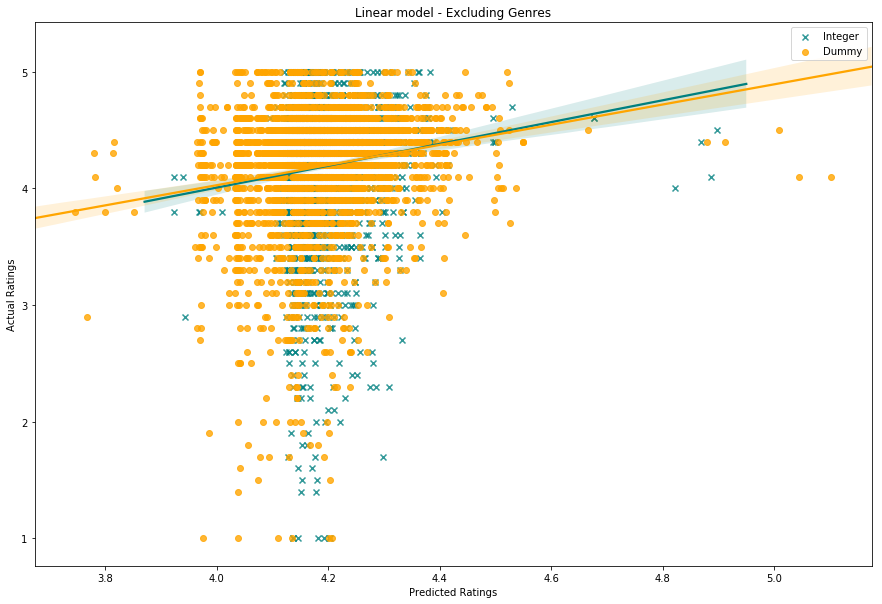

In [25]:
plt.figure(figsize=(15,10))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [26]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837612
Integer encoding(mean) :4.195198896084837
Dummy encoding(mean) :4.189999041405002
Integer encoding(std) :0.06429581423201099
Dummy encoding(std) :0.10676395505629097


Looking at the linear model using the genre label as a numeric value.

In [27]:
#Including genre label

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results, name = 'Linear(inc Genre) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


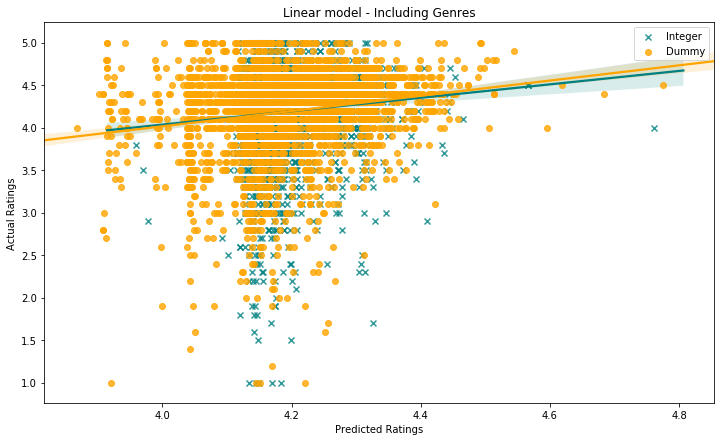

In [28]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [29]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.193686703783789
Dummy encoding(mean) :4.192379488563058
Integer encoding(std) :0.06021586161432079
Dummy encoding(std) :0.10311964647888888


We see a slight difference in the mean between the integer and dummy encoded linear models. The dummy encoded model's std is still higher than the integer encoded model.



In [30]:
#Excluding genres
from sklearn import svm
#Integer encoding

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based


X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

Results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


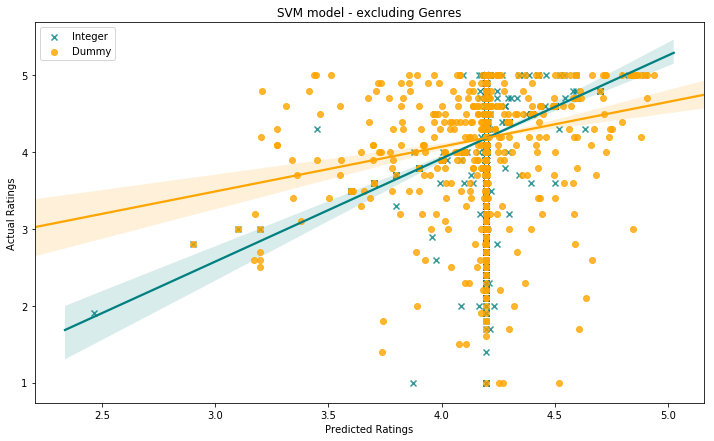

In [31]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [32]:
print ('Integer encoding(mean) :' + str(Results2.mean()))
print ('Dummy encoding(mean) :'+ str(Results2_d.mean()))
print ('Integer encoding(std) :' + str(Results2.std()))
print ('Dummy encoding(std) :'+ str(Results2_d.std()))

Integer encoding(mean) :4.198174631739803
Dummy encoding(mean) :4.19420025654872
Integer encoding(std) :0.07842758263434008
Dummy encoding(std) :0.13969318659672042


The results are quite interesting. Overall the model predicted quite a bit of ratings to be approximately at 4.2, even though the actual ratings were not. Looking at the scatterplot, the integer encoded model seems to have performed better in this instance.

As usual, the dummy encoded model has a higher std than the integer encoded model.

In [33]:
#Integer encoding, including Genres_c
model2a = svm.SVR()

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2a.fit(X_train,y_train)

Results2a = model2a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'SVM(inc Genres) - Integer'),ignore_index = True)

#dummy encoding, including Genres_c
model2a = svm.SVR()

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2a.fit(X_train_d,y_train_d)

Results2a_d = model2a.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2a_d, name = 'SVM(inc Genres) - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


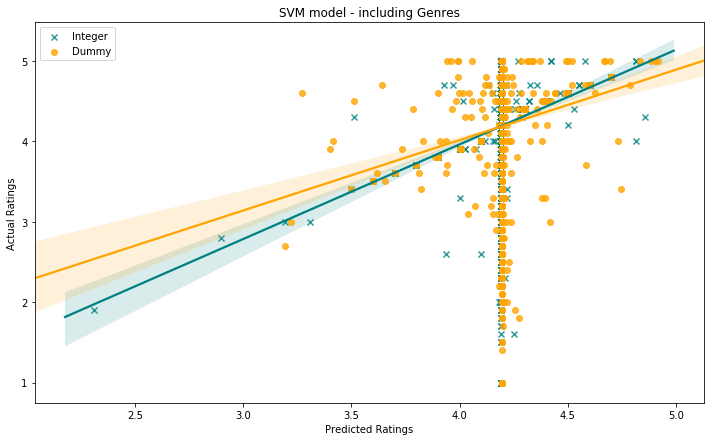

In [34]:
plt.figure(figsize=(12,7))
sns.regplot(Results2a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [35]:
print ('Integer encoding (mean) :' + str(Results2a.mean()))
print ('Dummy encoding (mean) :'+ str(Results2a_d.mean()))
print ('Integer encoding (standard dev) :' + str(Results2a.std()))
print ('Dummy encoding (standard dev) :'+ str(Results2a_d.std()))

Integer encoding (mean) :4.194112742576511
Dummy encoding (mean) :4.197539880787625
Integer encoding (standard dev) :0.07436049089595118
Dummy encoding (standard dev) :0.08607949117995961


In [36]:
# random forest regression model: This was found online:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

# evaluation of results:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

# dummy model:

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3_d = RandomForestRegressor()
model3_d.fit(X_train_d,y_train_d)
Results3_d = model3_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


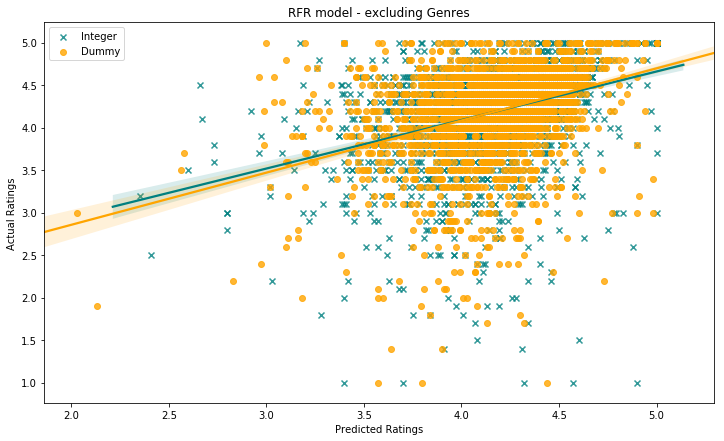

In [37]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [38]:
print ('Integer encoding (mean) :' + str(Results3.mean()))
print ('Dummy encoding (mean) :'+ str(Results3_d.mean()))
print ('Integer encoding (standard dev) :' + str(Results3.std()))
print ('Dummy encoding (standard dev) :'+ str(Results3_d.std()))

Integer encoding (mean) :4.180752611585945
Dummy encoding (mean) :4.189063746438746
Integer encoding (standard dev) :0.30919008336276693
Dummy encoding (standard dev) :0.30654578836870516


<Figure size 1008x720 with 0 Axes>

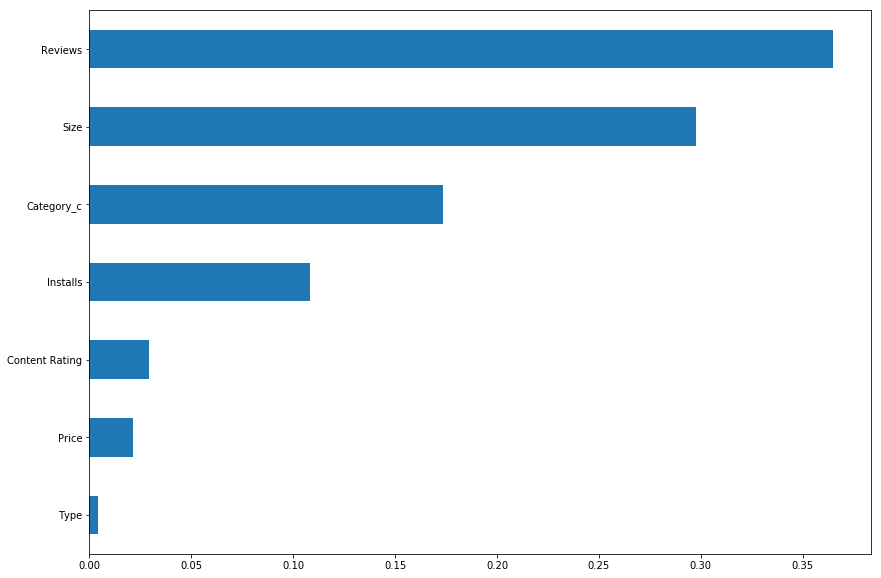

In [39]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

<Figure size 1008x720 with 0 Axes>

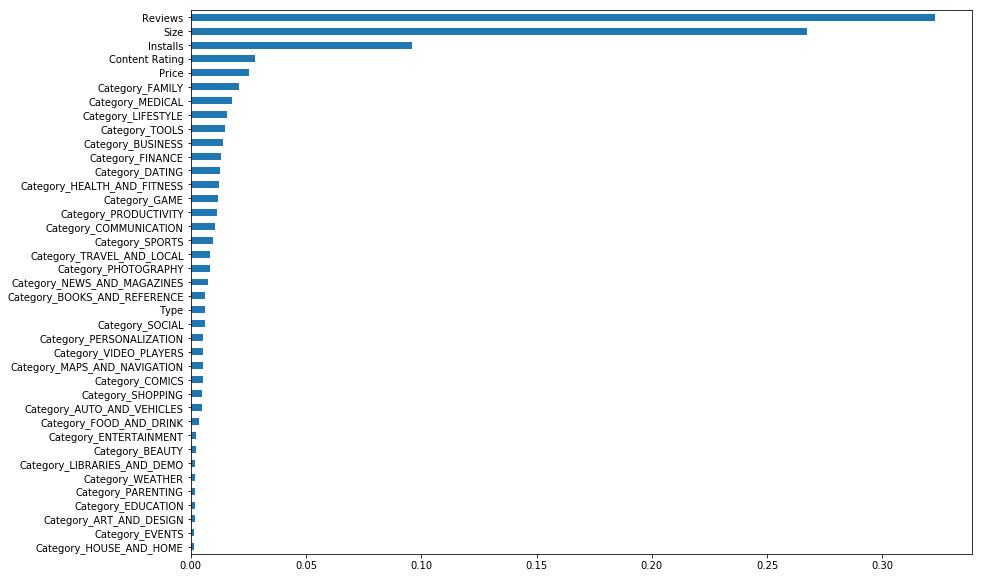

In [40]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Looking at the breakdown even further, it would seem that indeed Reviews, size and number of install remain as a significant contributer to the predictiveness of app ratings.  What's interesting to me is that how the Tools category of apps have such a high level of predictiveness in terms of ratings, as say compared to the Food and Drink category.

In [41]:

#Including Genres_C

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3a = RandomForestRegressor()
model3a.fit(X_train,y_train)
Results3a = model3a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3a_d = RandomForestRegressor()
model3a_d.fit(X_train_d,y_train_d)
Results3a_d = model3a_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a_d, name = 'RFR(inc Genres) - Dummy'),ignore_index = True)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


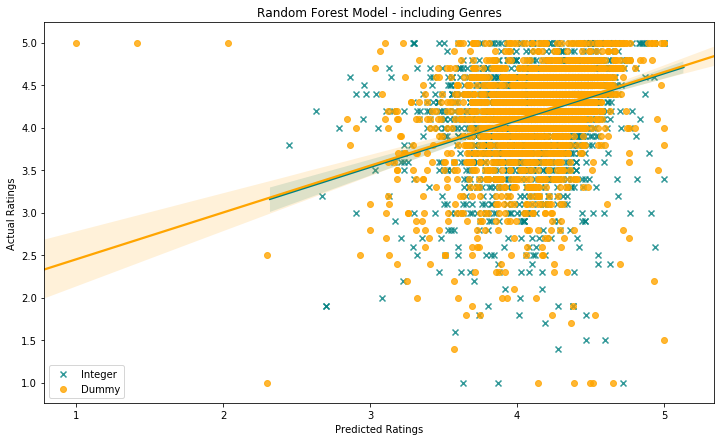

In [42]:
plt.figure(figsize=(12,7))
sns.regplot(Results3a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Random Forest Model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [43]:
print ('Integer encoding (mean): ' + str(Results3.mean()))
print ('Dummy encoding (mean): '+ str(Results3_d.mean()))
print ('Integer encoding(standard dev): ' + str(Results3.std()))
print ('Dummy encoding(standard dev): '+ str(Results3_d.std()))

Integer encoding (mean): 4.180752611585945
Dummy encoding (mean): 4.189063746438746
Integer encoding(standard dev): 0.30919008336276693
Dummy encoding(standard dev): 0.30654578836870516


Again with the inclusion of the genre variable, the results do not seem to defer significantly as compared to the previous results.

<Figure size 1008x720 with 0 Axes>

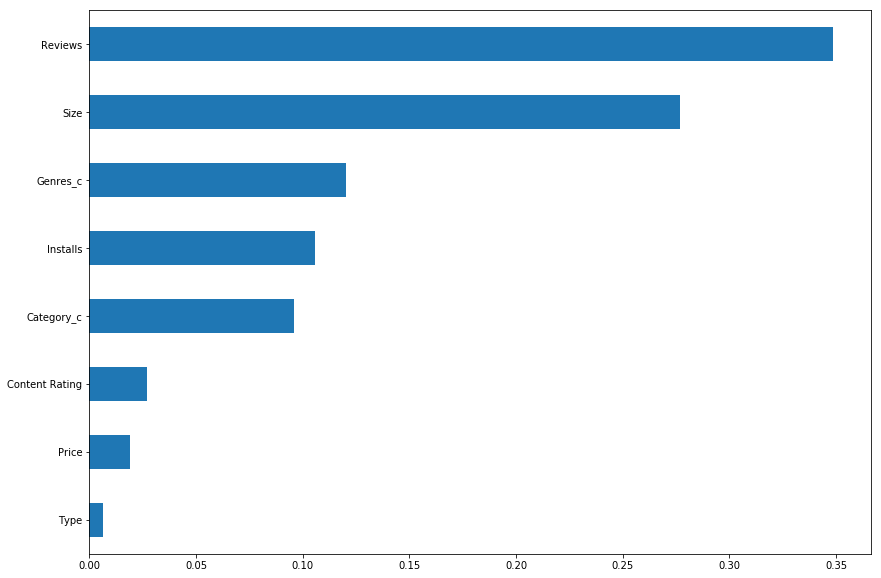

In [44]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3a.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

From the results, it would seem that the genre section actually plays an important part in the decision tree making. Yet the exclusion of it dosent seem to significantly impact results. This to me is quite interesting.

<Figure size 1008x720 with 0 Axes>

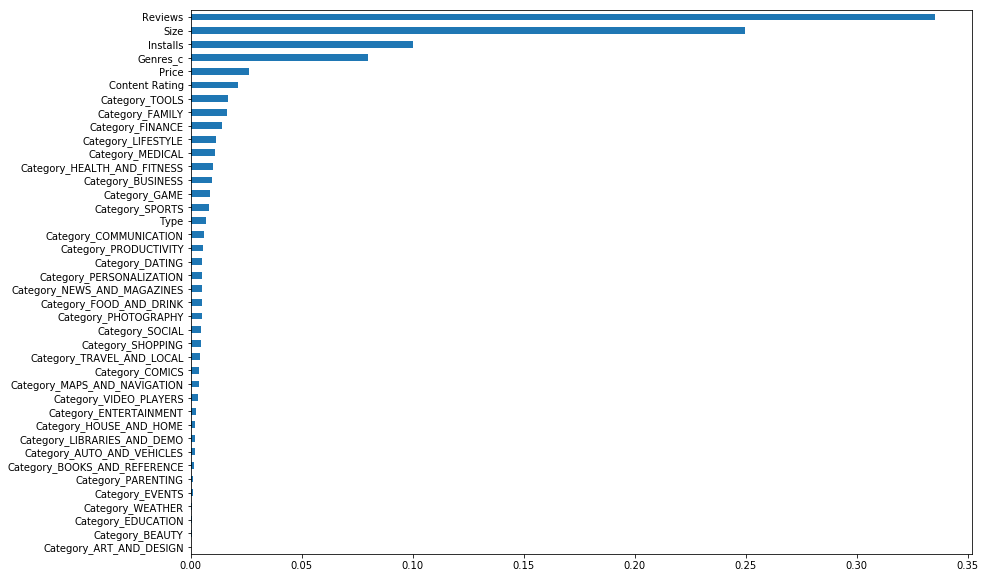

In [45]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3a_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

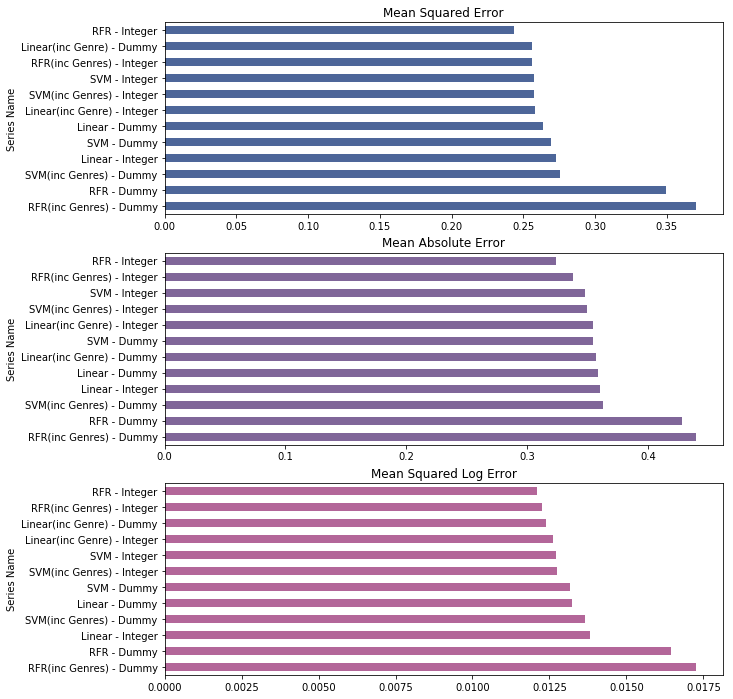

In [46]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()
